Consider different random orthogonal matrices. Fix eigenvalue (eg assuming two to be the same) and consider the error in the approximation of dR by dC and dE.

See details on random orthogonal matrices from Nick Higham https://nhigham.com/2020/04/22/what-is-a-random-orthogonal-matrix/

In [6]:
from time import time
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
from scipy.stats import ortho_group
# include the src path
sys.path.insert(0, "src")
from EigenValueDecomposition import *
from MinMaxthetafromQRQI import *
from SortEigenValues import *
from AnglesSortedQRQI import *
from SplitTensor import *
from Fmeasure import *
from Commeasure import *

In [7]:
# Fix number of cases to be considered and fix some eigenvalues.
N=1000
uR=[2,4,5]
uRtilde=uR
uI=[3,5,7]
MultR=[1,1,1]
MultI=[1,1,1]
MultRtilde=[1,1,1]

N0=np.zeros((3,3))
Rstore=np.zeros((N,9))
Istore=np.zeros((N,9))
Mlist=np.zeros(9, dtype=complex)
TensorArray=np.zeros((N,9),dtype=complex)
Frequencies=np.zeros(N)
URstore=np.zeros((N,3))
UIstore=np.zeros((N,3))
URtildestore=np.zeros((N,3))
QRstore=np.zeros((N,3,3))
QIstore=np.zeros((N,3,3))
QRtildestore=np.zeros((N,3,3))
MultRstore=np.zeros(N)
MultIstore=np.zeros(N)
MultRtildestore=np.zeros(N)


In [8]:
for n in range(N):
    # Generate a random orthogonal matrix for R and I
    orthogonalmatrixR = ortho_group.rvs(dim=3)
    while np.linalg.det(orthogonalmatrixR)<0:
        # The generated orthogonal matrix is not garanteed to have det +1!
        # Keep calling to make sure we get one with this property.
        orthogonalmatrixR = ortho_group.rvs(dim=3)
    print(orthogonalmatrixR,np.linalg.det(orthogonalmatrixR))
    VR=orthogonalmatrixR
    VRtilde=VR
    #orthogonalmatrixI = ortho_group.rvs(dim=3)
    #while np.linalg.det(orthogonalmatrixI)<0:
        # The generated orthogonal matrix is not garanteed to have det +1!
        # Keep calling to make sure we get one with this property.
    #    orthogonalmatrixI = ortho_group.rvs(dim=3)
    #VI=orthogonalmatrixI
    Rotx=np.zeros((3,3))
    Roty=np.zeros((3,3))
    Rotz=np.zeros((3,3))
    wght=0.1
    theta=wght*np.random.rand(1)[0]
    Rotx[0,0]=1
    Rotx[1,1]=np.cos(theta)
    Rotx[1,2]=-np.sin(theta)
    Rotx[2,1]=np.sin(theta)
    Rotx[2,2]=np.cos(theta)
    theta=wght*np.random.rand(1)[0]
    Roty[1,1]=1
    Roty[0,0]=np.cos(theta)
    Roty[0,2]=np.sin(theta)
    Roty[2,0]=-np.sin(theta)
    Roty[2,2]=np.cos(theta)
    theta=wght*np.random.rand(1)[0]
    Rotz[0,0]=np.cos(theta)
    Rotz[0,1]=-np.sin(theta)
    Rotz[1,0]=np.sin(theta)
    Rotz[1,1]=np.cos(theta)
    Rotz[2,2]=1
    Rot=Rotx@Roty@Rotz
    VI=Rot@VR
    
    
    # Obtain the corresponding R and I
    R=np.transpose(VR)@np.diag(uR)@VR
    I=np.transpose(VI)@np.diag(uI)@VI
    Rtilde=R+N0
    M=Rtilde+1j*I
    Mlist[0]=M[0,0]
    Mlist[1]=M[0,1]
    Mlist[2]=M[0,2]
    Mlist[3]=M[1,0]
    Mlist[4]=M[1,1]
    Mlist[5]=M[1,2]
    Mlist[6]=M[2,0]
    Mlist[7]=M[2,1]
    Mlist[8]=M[2,2]
    for i in range(9):
        TensorArray[n,i]=Mlist[i]
    # We cannot use eig to compute eigenvalues from eig since eigenvalues are placed close together!
    MultRstore[n] = np.max(MultR)
    MultIstore[n] = np.max(MultI)
    MultRtildestore[n] = np.max(MultRtilde)
    for i in range(3):
            URstore[n,i]=uR[i]
            UIstore[n,i]=uI[i]
            URtildestore[n,i]=uRtilde[i]

            for j in range(3):
                QRstore[n,i,j]=VR[i,j]
                QIstore[n,i,j]=VI[i,j]
                QRtildestore[n,i,j]=VRtilde[i,j]
        
Rstore,Istore,Rtildestore = SplitTensor(TensorArray,Frequencies,N0)

# Determine eigenvalue decompositions of N0, R, I, Rtilde (no sorting applied), and their multiplicities
#MultRstore, MultIstore, MultRtildestore, URstore, UIstore, URtildestore, QRstore, QIstore, QRtildestore = EigenValueDecomposition(N0,TensorArray,Frequencies)

# Determine the maximal and minimal angles from QR and QI also output d_F metric for these orderings
FixEvecs="No"
MinAnglestoreRI, MaxAnglestoreRI, dFMinAnglestoreRI, dFMaxAnglestoreRI = MinMaxthetafromQRQI(Frequencies,QRstore,QIstore,URstore, UIstore,MultRstore,MultIstore,FixEvecs)

# Sort eigenvalues (and eigenvectors) so that || Lambda_R - Lambda_I || is maximal
sorteigenvalues="MaxDifference"

#SortedMultRstore, SortedMultIstore, SortedMultRtildestore, SortedURstore, SortedUIstore, SortedURtildestore, SortedQRstore, SortedQIstore, SortedQRtildestore = SortEigenValues(MultRstore, MultIstore, MultRtildestore, URstore, UIstore, URtildestore, QRstore, QIstore, QRtildestore, Frequencies)
SortedMultRstore, SortedMultIstore, SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore = SortEigenValues(MultRstore, MultIstore, URstore, UIstore, QRstore, QIstore, Frequencies, sorteigenvalues)

# Obtain angles for this sorted min-max combination
AnglestoreRIsortedmaxdiff = AnglesSortedQRQI(SortedQRstore,SortedQIstore,Frequencies)

#Obtain f meauses (approx and exact constant)
AnglestoreRIfmeasfullconstsortedmaxdiff, AnglestoreRIfmeasapprxconstsortedmaxdiff_min,AnglestoreRIfmeasapprxconstsortedmaxdiff_max = Fmeasure(sorteigenvalues,SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore, Rstore,Istore, Frequencies)

#Obtain Com-meauses (approx and exact constant)
AnglestoreRIcommeasfullconstsortedmaxdiff, AnglestoreRIcommeasapprxconstsortedmaxdiff_min,AnglestoreRIcommeasapprxconstsortedmaxdiff_max = Commeasure(sorteigenvalues,SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore, Rstore,Istore, Frequencies)

# Sort eigenvalues (and eigenvectors) so that || Lambda_R - Lambda_I || is minimal
sorteigenvalues="MinDifference"
#SortedMultRstore, SortedMultIstore, SortedMultRtildestore, SortedURstore, SortedUIstore, SortedURtildestore, SortedQRstore, SortedQIstore, SortedQRtildestore = SortEigenValues(MultRstore, MultIstore, MultRtildestore, URstore, UIstore, URtildestore, QRstore, QIstore, QRtildestore, Frequencies)
SortedMultRstore, SortedMultIstore, SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore = SortEigenValues(MultRstore, MultIstore, URstore, UIstore, QRstore, QIstore, Frequencies, sorteigenvalues)
# Obtain angles for this sorted min-max combination
AnglestoreRIsortedmindiff = AnglesSortedQRQI(SortedQRstore,SortedQIstore,Frequencies)

#Obtain f meauses (approx and exact constant)
#AnglestoreRIfmeasfullconstsortedmindiff, AnglestoreRIfmeasapprxconstsortedmindiff = Fmeasure(sorteigenvalues,SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore, Rstore,Istore, Frequencies)
AnglestoreRIfmeasfullconstsortedmindiff, AnglestoreRIfmeasapprxconstsortedmindiff_min, AnglestoreRIfmeasapprxconstsortedmindiff_max = Fmeasure(sorteigenvalues,SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore, Rstore,Istore, Frequencies)

#Obtain Com-meauses (approx and exact constant)
AnglestoreRIcommeasfullconstsortedmindiff, AnglestoreRIcommeasapprxconstsortedmindiff_min,AnglestoreRIcommeasapprxconstsortedmindiff_max = Commeasure(sorteigenvalues,SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore, Rstore,Istore, Frequencies)


# Compute error measures
# Error between d_R and approx d_R from d_E
d_R=np.fmin(MinAnglestoreRI,MaxAnglestoreRI)
    
# Error between d_R and approx d_R from d_C
d_C = np.fmin(AnglestoreRIcommeasapprxconstsortedmindiff_min,AnglestoreRIcommeasapprxconstsortedmaxdiff_max )
Err_dR_dC = np.abs(d_R-d_C)/np.abs(d_R)

d_E=np.fmin(AnglestoreRIfmeasapprxconstsortedmaxdiff_max,AnglestoreRIfmeasapprxconstsortedmindiff_min)
Err_dR_dE = np.abs(d_R-d_E)/np.abs(d_R)


d_F=dFMinAnglestoreRI
Err_dR_dF = np.abs(d_R-d_F/np.sqrt(2))/np.abs(d_R)

[[ 0.0272404  -0.95984905 -0.27919126]
 [ 0.7396364  -0.16852963  0.65156409]
 [-0.67245517 -0.22424889  0.70534848]] 1.0
[[ 0.13214499  0.58426958 -0.8007289 ]
 [ 0.10422696 -0.81152517 -0.57494665]
 [-0.98573548 -0.00748122 -0.16813562]] 1.0
[[ 0.71053369 -0.48198394  0.51267276]
 [-0.04382507 -0.75747419 -0.65139252]
 [ 0.70229712  0.44036841 -0.55933391]] 0.9999999999999993
[[ 0.69192289  0.68785422  0.21931547]
 [-0.30126981 -0.00097441  0.95353844]
 [ 0.65610915 -0.7258482   0.2065555 ]] 1.0000000000000002
[[-0.15479569  0.52539718  0.8366577 ]
 [ 0.92246759 -0.22631103  0.31278883]
 [ 0.35368324  0.82020797 -0.4496299 ]] 0.9999999999999999
[[-0.38232367 -0.60550928  0.69798791]
 [-0.09847678 -0.72437268 -0.68233902]
 [ 0.91876598 -0.32960996  0.21731622]] 0.9999999999999999
[[-0.21689135 -0.36994855 -0.90338044]
 [ 0.96351205  0.06756486 -0.25899715]
 [ 0.15685239 -0.92659218  0.34179565]] 1.0000000000000002
[[ 0.33467752 -0.48569928 -0.80751914]
 [-0.60918333 -0.76531055  0.207

[[-0.64186595  0.25248156 -0.72405881]
 [ 0.66366511 -0.29009875 -0.68948629]
 [-0.38413112 -0.92309034  0.01864131]] 1.0
[[-0.45359863 -0.53838122 -0.71020697]
 [-0.02836374  0.80522279 -0.59229364]
 [ 0.89075461 -0.24851946 -0.38051846]] 1.0
[[ 0.693029    0.14356693  0.70646964]
 [-0.13276156 -0.93779228  0.32081149]
 [ 0.70857969 -0.31612368 -0.63085707]] 0.9999999999999999
[[ 0.59326552  0.00949792  0.80495081]
 [ 0.20799963  0.96416688 -0.16467663]
 [-0.77767099  0.26512643  0.5700314 ]] 1.0000000000000004
[[ 0.16710545  0.85226528  0.49570118]
 [-0.58785285  0.48975463 -0.64387066]
 [-0.79152056 -0.18380506  0.58284724]] 1.0000000000000004
[[ 0.76155416  0.44278263  0.47326399]
 [ 0.60609364 -0.74519134 -0.27810134]
 [ 0.22953379  0.49863153 -0.8358713 ]] 1.0
[[ 0.98084448 -0.1941031   0.01637353]
 [ 0.19476642  0.97586782 -0.09873214]
 [ 0.00318582  0.10002989  0.99497933]] 1.0000000000000004
[[ 0.26149343 -0.17463269  0.94927583]
 [ 0.61926364 -0.72403625 -0.3037829 ]
 [ 0.740

In [15]:
d_E

array([0.69894647, 0.63058222, 0.25859754, 0.64022074, 0.41620133,
       0.75014863, 0.65307675, 0.22958173, 0.68890162, 0.61169324,
       0.3025408 , 0.70878384, 0.6796972 , 0.45018018, 0.58244493,
       0.57383934, 0.54325532, 0.10918989, 0.74628008, 0.63886529,
       0.37410837, 0.37851365, 0.69314196, 0.34889383, 0.39418892,
       0.35041696, 0.3521528 , 0.14906395, 0.60125952, 0.61059179,
       0.58300997, 0.48674272, 0.67855443, 0.37233159, 0.59151692,
       0.55488746, 0.51715763, 0.57170021, 0.55012603, 0.57849229,
       0.67442273, 0.66733894, 0.43913522, 0.69695746, 0.78807539,
       0.40732869, 0.46560759, 0.70566595, 0.71330571, 0.26422847,
       0.35037693, 0.16984513, 0.80865383, 0.41256756, 0.25244137,
       0.77103565, 0.09488493, 0.54878433, 0.6554927 , 0.61093773,
       0.6267311 , 0.48649181, 0.72905967, 0.64349809, 0.42070241,
       0.6707619 , 0.66339675, 0.2886603 , 0.32118103, 0.51961137,
       0.38646523, 0.37819062, 0.67493948, 0.64380589, 0.40916

In [5]:
d_C

array([0.02671161, 0.05269424, 0.04796153, 0.05611104, 0.08444588,
       0.06063884, 0.08277238, 0.13642251, 0.05847878, 0.05373618,
       0.08888338, 0.05281134, 0.12238217, 0.10877998, 0.08494325,
       0.06987662, 0.07623106, 0.07358989, 0.07817704, 0.09733792,
       0.05009135, 0.04558564, 0.08758885, 0.06411888, 0.0530444 ,
       0.04748092, 0.06517483, 0.08799784, 0.08506279, 0.04085858,
       0.08577698, 0.10306105, 0.09905372, 0.11015595, 0.07753403,
       0.10181956, 0.07086366, 0.10003667, 0.10758976, 0.09854658,
       0.04107185, 0.02271401, 0.07233056, 0.04938462, 0.10456207,
       0.00964   , 0.03705596, 0.08199445, 0.04132271, 0.09997841,
       0.07514764, 0.07709261, 0.08096203, 0.07176591, 0.04271014,
       0.06076049, 0.08849959, 0.10612773, 0.03675752, 0.09550608,
       0.05021522, 0.0363939 , 0.07853972, 0.1143002 , 0.02949426,
       0.01960632, 0.04239441, 0.0886939 , 0.10664677, 0.07048959,
       0.03380276, 0.09291783, 0.06530321, 0.03903713, 0.02371

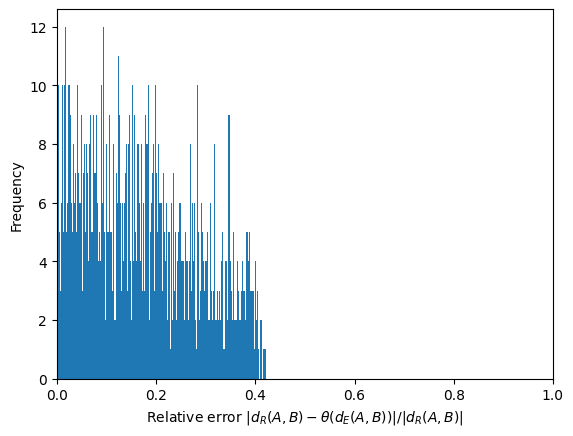

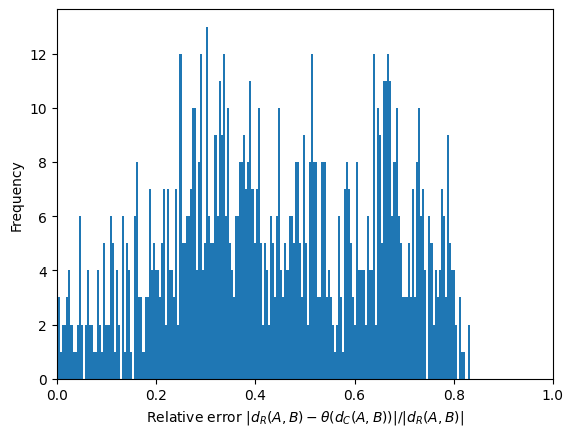

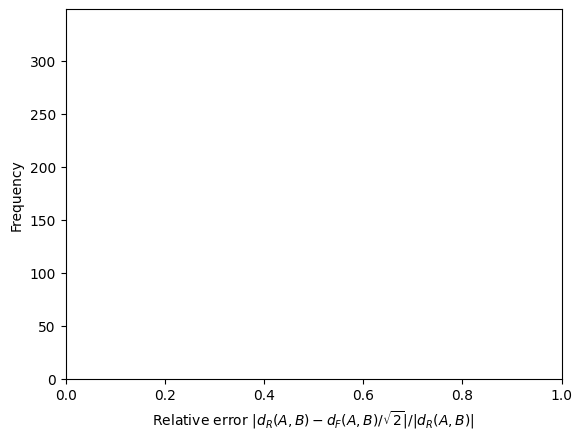

In [9]:
plt.hist(Err_dR_dE,bins=200)
plt.xlim(0,1)
plt.xlabel(r"Relative error $|d_R(A,B)-\theta(d_E(A,B))|/|d_R(A,B)| $")
plt.ylabel(r"Frequency")
plt.savefig("relative_error_1000_dRDE_rot_wght_0_1_mult111.pdf")
plt.show()     
plt.hist(Err_dR_dC,bins=200)
plt.xlim(0,1)
plt.xlabel(r"Relative error $|d_R(A,B)-\theta(d_C(A,B))|/|d_R(A,B)| $")
plt.ylabel(r"Frequency")
plt.savefig("relative_error_1000_dRDC_rot_wght_0_1_mult111.pdf")
plt.show()     
plt.hist(Err_dR_dF,bins=200)
plt.xlim(0,1)
plt.xlabel(r"Relative error $|d_R(A,B)-d_F(A,B)/\sqrt{2}|/|d_R(A,B)| $")
plt.ylabel(r"Frequency")
plt.savefig("relative_error_1000_dRDF_rot_wght_0_1_mult111.pdf")
plt.show()   

In [ ]:
print(Err_dR_dC)

In [13]:
d_E=np.fmax(AnglestoreRIfmeasapprxconstsortedmaxdiff_min,AnglestoreRIfmeasapprxconstsortedmaxdiff_max)
d_E

array([2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842

In [18]:
d_C


array([3.70305566e-16, 2.48253415e-16, 2.22910279e-16, 2.25487362e-16,
       6.93889390e-18, 1.92296269e-16, 9.81307787e-18, 1.75541673e-16,
       1.11022302e-16, 2.71947991e-16, 1.16523844e-16, 1.81210114e-16,
       3.59753377e-16, 1.19381245e-16, 1.11022302e-16, 2.26339869e-16,
       3.59920634e-16, 2.93737402e-16, 3.85092983e-16, 3.35371896e-16,
       2.28878340e-16, 3.16462252e-16, 1.35973996e-16, 1.75541673e-16,
       2.75466223e-16, 4.26389243e-16, 2.81003786e-16, 3.33066907e-16,
       3.28408400e-16, 8.77708367e-17, 7.06541606e-16, 3.64010962e-16,
       3.72380123e-16, 2.51337427e-16, 4.72660421e-16, 2.35513869e-16,
       1.74102007e-16, 3.36849175e-16, 3.69263917e-16, 3.20092913e-16,
       2.27401009e-16, 2.11380166e-16, 3.65199464e-16, 1.94289029e-16,
       1.59443643e-16, 1.24126708e-16, 4.74693378e-16, 6.74180589e-16,
       2.88444403e-16, 2.48253415e-16, 3.09073010e-16, 2.93737402e-16,
       1.11347088e-16, 1.79876688e-16, 1.66533454e-16, 1.14439170e-16,
      